# Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib



# Load the dataset

In [4]:
df=pd.read_csv(".\data\parkinsons - in.csv")

### Print the First 5 Rows from the Dataset

In [5]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#### Check the Size of the dataset

In [6]:
df.shape

(195, 24)

### Check the Summery of the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# EDA PART

### Eliminate the Unnecessary columns

In [8]:
df.drop(columns="name", axis=1, inplace=True)

### Check whether the column was drop or not

In [9]:
df.sample(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
19,156.405,189.398,142.822,0.00768,0.00005,0.00372,0.00399,0.01116,0.03995,0.348,...,0.05164,0.03365,17.153,1,0.649554,0.686080,-4.554466,0.340176,2.856676,0.322111
24,163.656,200.841,76.779,0.00742,0.00005,0.00380,0.00390,0.01140,0.01659,0.164,...,0.02214,0.01778,23.831,1,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961


### Print the Statistical Information of the dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


##### From the above this dataset have few outliers. I'll remove the outliers in the data cleaning process

### Check dataset have any missing values or not

In [11]:
def print_missing_values(df):
    missing_values = df.isnull().sum()
    missing_above_one = missing_values[missing_values > 0]
    
    if missing_above_one.empty:
        print("No columns have any missing value.")
    else:
        print("Columns with missing values:\n", missing_above_one)

print_missing_values(df)

No columns have any missing value.


### Check dublicated

In [12]:
df[df.duplicated()]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


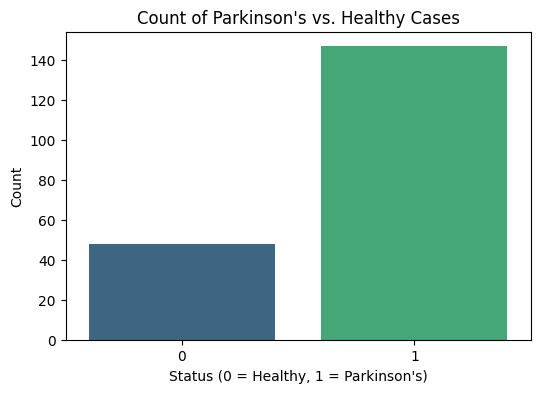

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['status'], palette="viridis")

# Add labels and title
plt.xlabel("Status (0 = Healthy, 1 = Parkinson's)")
plt.ylabel("Count")
plt.title("Count of Parkinson's vs. Healthy Cases")

# Show the plot
plt.show()

##### From the countplot i can recognise the target column is highly imbalanced so i need to balance it out

<Axes: >

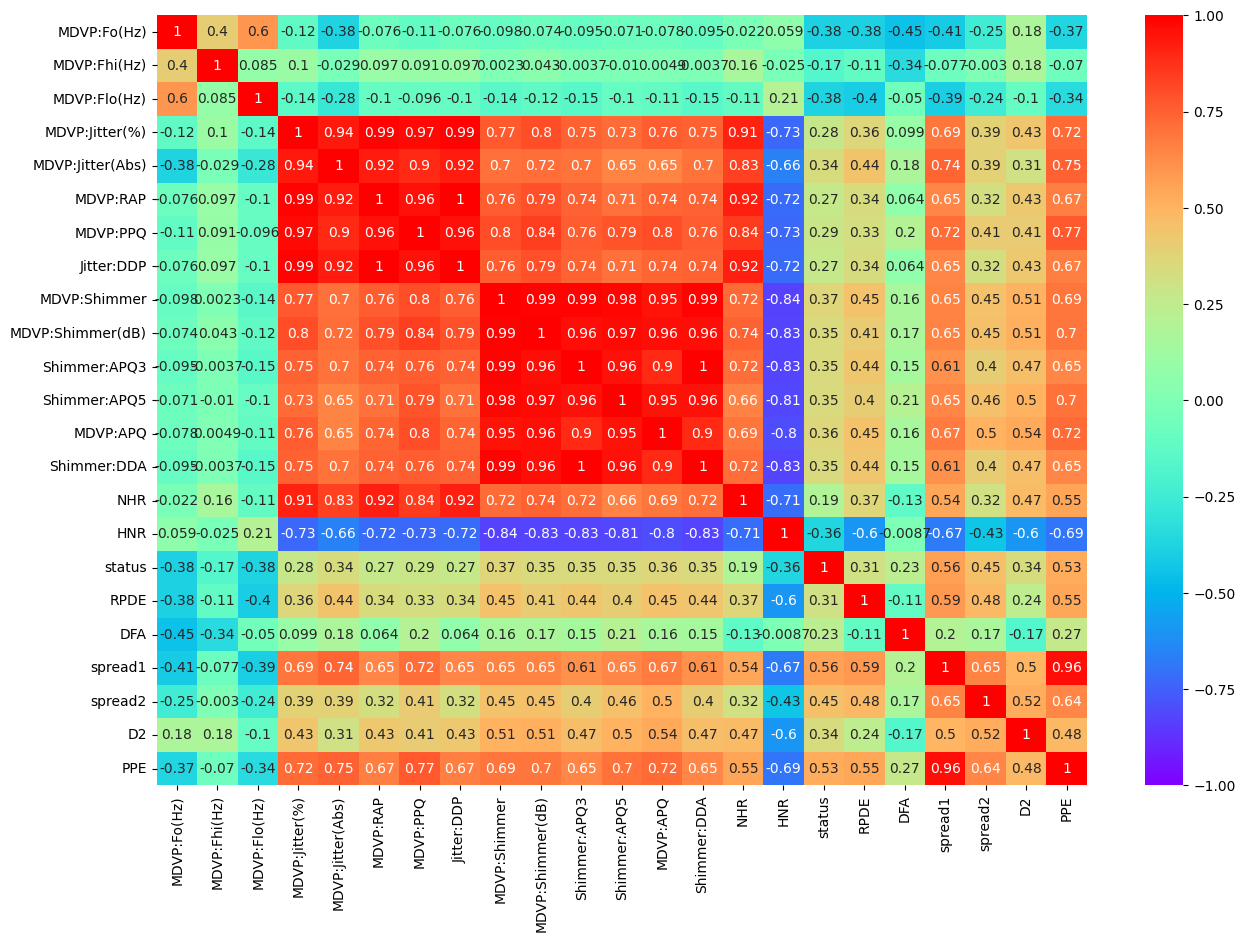

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='rainbow')

# Data Cleaning

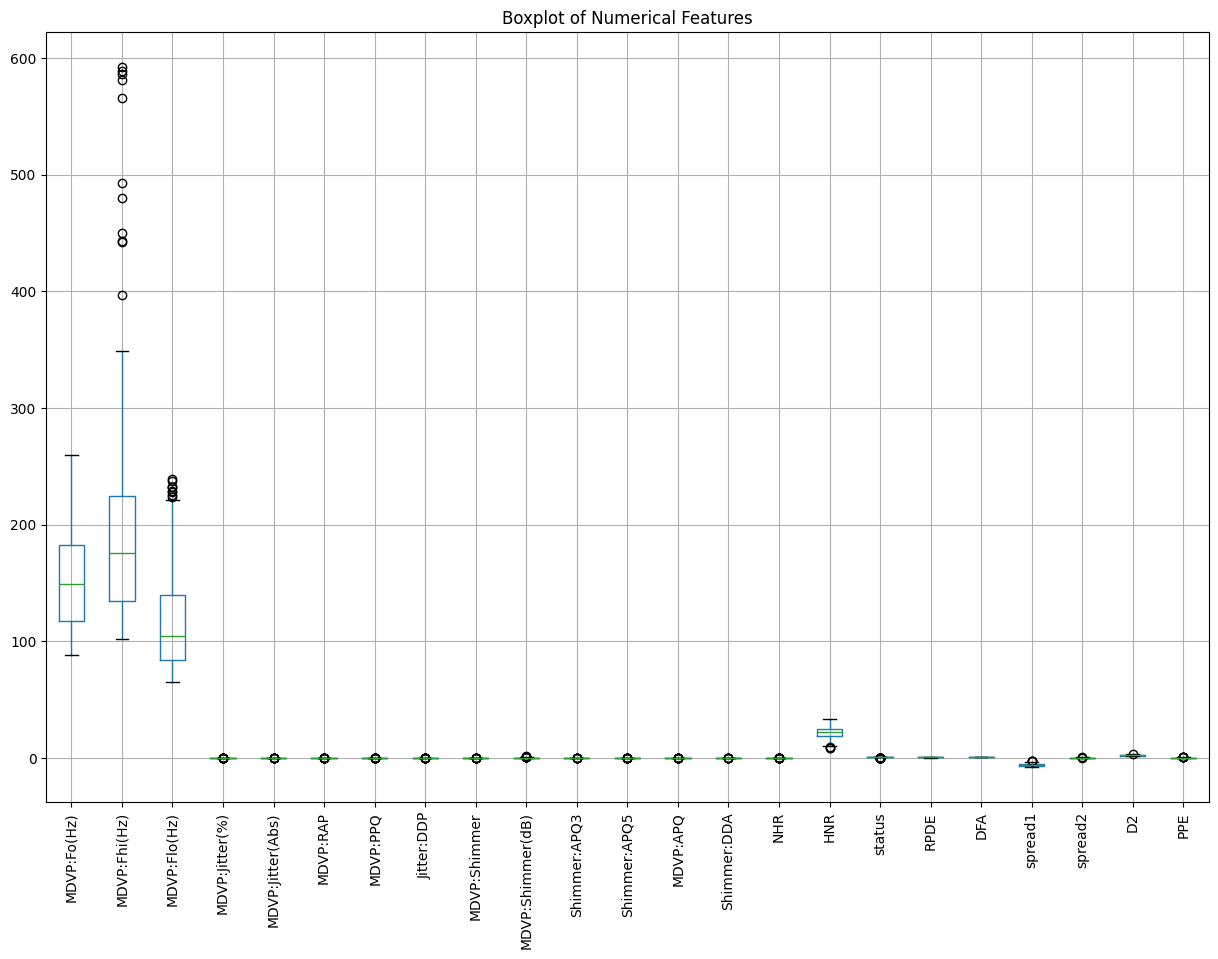

In [15]:
def plot_boxplots(df):
    """
    Plots boxplots for all numerical columns in the dataframe.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
    
    plt.figure(figsize=(15, 10))
    df[numeric_cols].boxplot(rot=90)  # Rotate labels for better readability
    plt.title("Boxplot of Numerical Features")
    plt.show()

# Call the function
plot_boxplots(df)

In [16]:
def count_outliers(df):
    """
    Counts the number of outliers in each numerical column using the IQR method.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  
    outlier_counts = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75) 
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_counts[col] = outliers.count()

    # Print the number of outliers for each column
    for col, count in outlier_counts.items():
        print(f"{col}: {count} outliers")

count_outliers(df)


MDVP:Fo(Hz): 0 outliers
MDVP:Fhi(Hz): 11 outliers
MDVP:Flo(Hz): 9 outliers
MDVP:Jitter(%): 14 outliers
MDVP:Jitter(Abs): 7 outliers
MDVP:RAP: 14 outliers
MDVP:PPQ: 15 outliers
Jitter:DDP: 14 outliers
MDVP:Shimmer: 8 outliers
MDVP:Shimmer(dB): 10 outliers
Shimmer:APQ3: 6 outliers
Shimmer:APQ5: 13 outliers
MDVP:APQ: 12 outliers
Shimmer:DDA: 6 outliers
NHR: 19 outliers
HNR: 3 outliers
status: 48 outliers
RPDE: 0 outliers
DFA: 0 outliers
spread1: 4 outliers
spread2: 2 outliers
D2: 1 outliers
PPE: 5 outliers


In [17]:

def apply_winsorization(df, limits=[0.05, 0.05]):
    for col in df.select_dtypes(include=["float64", "int64"]).columns:
        if col != "status":  # Avoid modifying target variable
            df[col] = winsorize(df[col], limits=limits)
    return df

df = apply_winsorization(df)

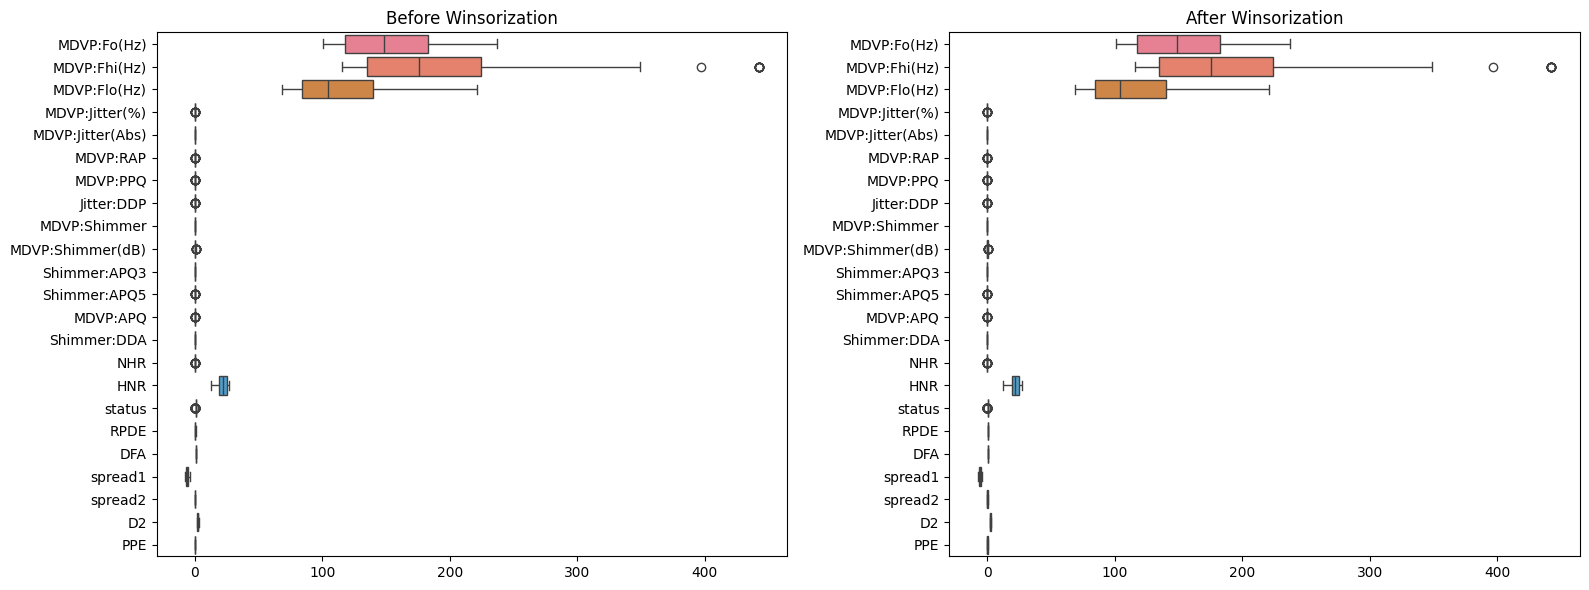

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Before Winsorization
sns.boxplot(data=df, orient="h", ax=axes[0])
axes[0].set_title("Before Winsorization")

# After Winsorization
sns.boxplot(data=df, orient="h", ax=axes[1])
axes[1].set_title("After Winsorization")

plt.tight_layout()
plt.show()

# Feature Selection

In [19]:
X = df.drop(columns=["status"])  # Remove target column
y = df["status"]

In [20]:
# Remove features with low variance (threshold = 0.01)
variance_selector = VarianceThreshold(threshold=0.01)
X_high_variance = variance_selector.fit_transform(X)

In [21]:
# Get feature names that passed the variance threshold
high_variance_features = X.columns[variance_selector.get_support()]
X = X[high_variance_features] 

In [22]:
# Select the top 15 most important features
selected_features = SelectKBest(mutual_info_classif, k=15).fit(X, y)

# Get feature scores
feature_scores = selected_features.scores_

# Get selected feature names
selected_columns = X.columns[selected_features.get_support()]

# Create a new DataFrame with only selected features + target
df = df[selected_columns.to_list() + ["status"]]

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Score": feature_scores})

# Sort by score (Highest to Lowest)
feature_importance = feature_importance.sort_values(by="Score", ascending=False)


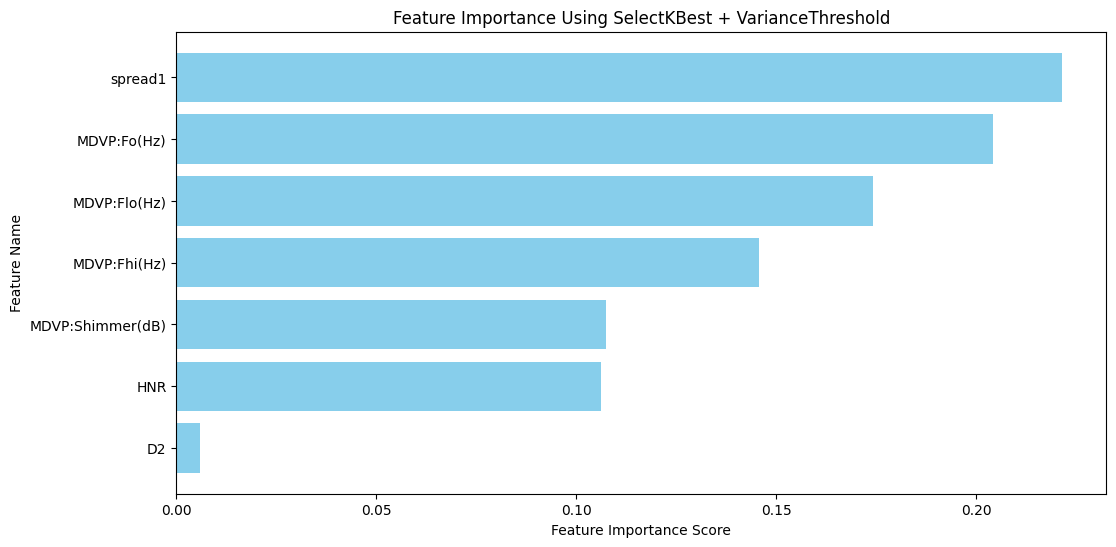

In [23]:
# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance["Feature"], feature_importance["Score"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance Using SelectKBest + VarianceThreshold")
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

In [30]:
print(feature_importance)

            Feature     Score
5           spread1  0.221368
0       MDVP:Fo(Hz)  0.204207
2      MDVP:Flo(Hz)  0.174088
1      MDVP:Fhi(Hz)  0.145604
3  MDVP:Shimmer(dB)  0.107485
4               HNR  0.106137
6                D2  0.005900


# Data Balancing

In [24]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(df.drop(columns=["status"]), df["status"])

In [ ]:

# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Model Training 

In [26]:
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "GaussianNB": GaussianNB()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"{name} Train Accuracy: {train_accuracy:.4f}")
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_pred_test))
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model

print(f"Best Model: {best_model}")


RandomForest Train Accuracy: 1.0000
RandomForest Test Accuracy: 0.9661
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

GradientBoosting Train Accuracy: 1.0000
GradientBoosting Test Accuracy: 0.9322
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.96      0.90      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59

LogisticRegression Train Accuracy: 0.8255
LogisticRegression Test Accuracy: 0.7966
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
    

# hyperparameter tuning

In [27]:
# Model Training with Hyperparameter Tuning 
param_grid = {
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "KNeighbors": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "DecisionTree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "GaussianNB": GaussianNB()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    if name in param_grid:
        model = RandomizedSearchCV(model, param_grid[name], n_iter=10, cv=3, n_jobs=-1, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"{name} Train Accuracy: {train_accuracy:.4f}")
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_pred_test))
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model

print(f"Best Model: {best_model}")


RandomForest Train Accuracy: 1.0000
RandomForest Test Accuracy: 0.9492
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.96      0.93      0.95        29

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

GradientBoosting Train Accuracy: 1.0000
GradientBoosting Test Accuracy: 0.9322
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.96      0.90      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59

LogisticRegression Train Accuracy: 0.8255
LogisticRegression Test Accuracy: 0.7966
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
    

In [28]:
joblib.dump(best_model,'model.pkl')

['model.pkl']

In [29]:
joblib.load('model.pkl')

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [31]:
# Predict on test set
y_pred_test = best_model.predict(X_test)

# Count 0s and 1s in predictions
unique, counts = np.unique(y_pred_test, return_counts=True)
print("Prediction Distribution:", dict(zip(unique, counts)))

Prediction Distribution: {0: 31, 1: 28}


## Model Trained

    1. Random Forest Classifier
    2. Gradient Boosting Classifier
    3. Logistic Regression
    4. K-Nearest Neighbors (KNN)
    5. Support Vector Machine (SVC)
    6. Decision Tree
    7. Naive Bayes (GaussianNB)

##  Evaluation Metrics:

 * Accuracy: Measures overall correctness (TP + TN) / Total Samples
 * Precision: Measures how many predicted positive cases were actually positive TP / (TP + FP)
 * Recall (Sensitivity): Measures how many actual positive cases were correctly predicted TP / (TP + FN)
 * F1-Score: Harmonic mean of precision and recall 2 * (Precision * Recall) / (Precision + Recall)


## Model Performance Table

| Model                   | Accuracy | Precision | Recall | F1-Score |
|-------------------------|----------|-----------|--------|----------|
| Random Forest          | 0.95    | 0.95     | 0.95   | 0.95    |
| Gradient Boosting      | 0.93   | 0.93      | 0.93   | 0.93   |
| Logistic Regression    | 0.80     | 0.80      | 0.80  | 0.80    |
| K-Nearest Neighbors   | 0.92     | 0.92      | 0.01  | 0.91   |
| Support Vector Classifier | 0.82     | 0.82      | 0.81  | 0.81   |
| Decision Tree         | 0.93     | 0.93      | 0.93  | 0.93   |
| Naive Bayes           | 0.82     | 0.82     | 0.81   | 0.81  |



#  Challenges Faced

1. Data Imbalance
 
 * Problem: The dataset had more Parkinson’s patients (1) than healthy individuals (0), making the model biased toward predicting 1.

 * Solution: Used SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

2. Feature Selection

 * Problem: Too many features increased computation time and overfitting risk.
 * Solution: Applied:
     * VarianceThreshold to remove low-variance features.
     * SelectKBest (Mutual Information) to select the top 15 most important features.
